In [2]:
%matplotlib inline

#Load required modules
import sys, os, argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.graphics.boxplots import violinplot
import numpy as np
import seaborn as sns
import pandas as pd

### Set up seaborn appearence
mpl.rc('text', usetex = True)
sns.set_context("notebook", font_scale=1.5)

## Downsampling experiments (decreasing coverage, purity, \#samples)

In [79]:
res_m5_down = pd.read_csv("../sims/machina/results_MACHINA_downsampled_m5.txt", sep=",")
res_m5_down['samples'] = res_m5_down['samples'].fillna(0.0).astype(int)
res_m5_down['coverage'] = res_m5_down['coverage'].fillna(0.0).astype(int)
res_m5_down.rename(index=str, columns={'samples' : '\#samples'}, inplace=True)

In [80]:
res_m5_down.head()

,pattern,seed,\#samples,purity,coverage,mut_tree,enforced,inferred,mu,gamma,...,RF,recallT,precisionT,FscoreT,recallG,precisionG,FscoreG,recallMultiG,precisionMultiG,FscoreMultiG
0,pM,0,1,0.5,10000,0,R,pPS,5,4,...,11,0.5,1.00,0.666667,0.6,0.75,0.666667,0.571429,0.8,0.666667
1,pM,0,1,0.5,1000,0,R,pPS,5,4,...,10,0.5,1.00,0.666667,0.6,0.75,0.666667,0.571429,0.8,0.666667
2,pM,0,1,0.5,1000,1,R,pPS,5,4,...,10,0.5,1.00,0.666667,0.6,0.75,0.666667,0.571429,0.8,0.666667
3,pM,0,1,0.5,200,6,R,mM,5,5,...,10,0.5,0.75,0.600000,0.8,0.80,0.800000,0.571429,0.8,0.666667
4,pM,0,1,0.5,200,1,R,mM,5,5,...,10,0.5,0.75,0.600000,0.8,0.80,0.800000,0.571429,0.8,0.666667


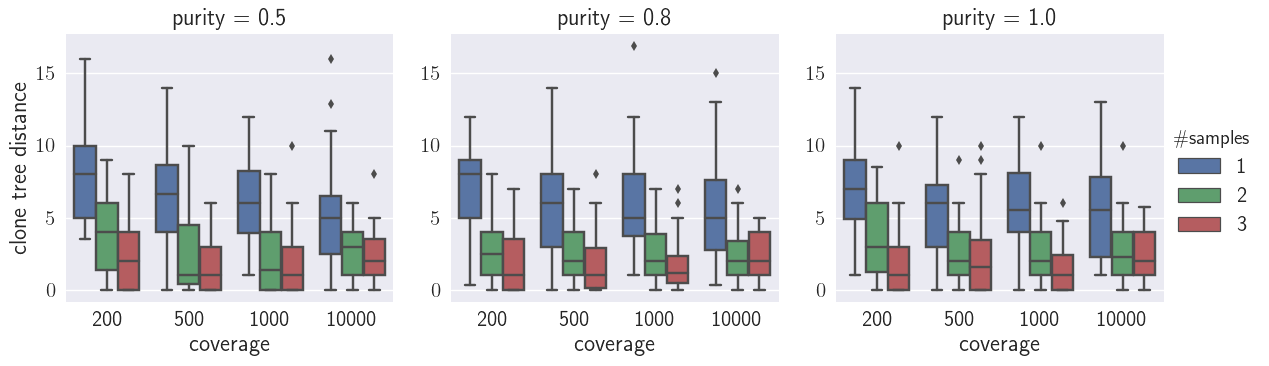

In [81]:
res_m5_down_RF = res_m5_down.groupby(['pattern', 'seed', '\#samples', 'purity', 'coverage'])['RF'].mean().to_frame("RF").reset_index(level=['\#samples', 'purity', 'coverage', 'pattern'])
ax = sns.factorplot(data=res_m5_down_RF, col="purity", hue="\#samples", 
                    x="coverage", order=[200,500,1000,10000],
                    y="RF", 
                    kind="box")
ax.axes[0,0].set_ylabel('clone tree distance')
plt.savefig("downsampling_RF.pdf")

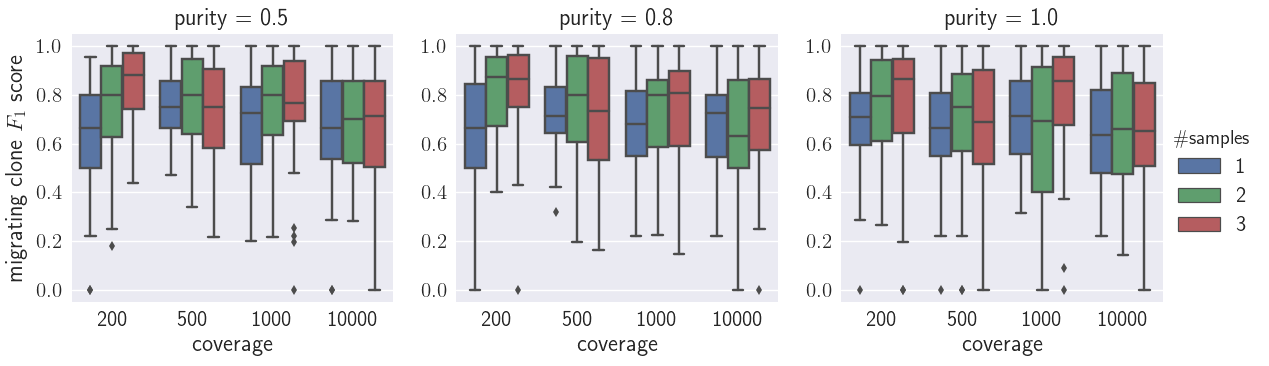

In [82]:
res_m5_down_mig = res_m5_down.groupby(['pattern', 'seed', '\#samples', 'purity', 'coverage'])['FscoreT'].mean().to_frame("FscoreT").reset_index(level=['\#samples', 'purity', 'coverage', 'pattern'])
ax = sns.factorplot(data=res_m5_down_mig, col="purity", hue="\#samples", 
                    x="coverage", order=[200,500,1000, 10000],
                    y="FscoreT", 
                    kind="box")
ax.axes[0,0].set_ylabel('migrating clone $F_1$ score')
plt.savefig("downsampling_scoreT.pdf")

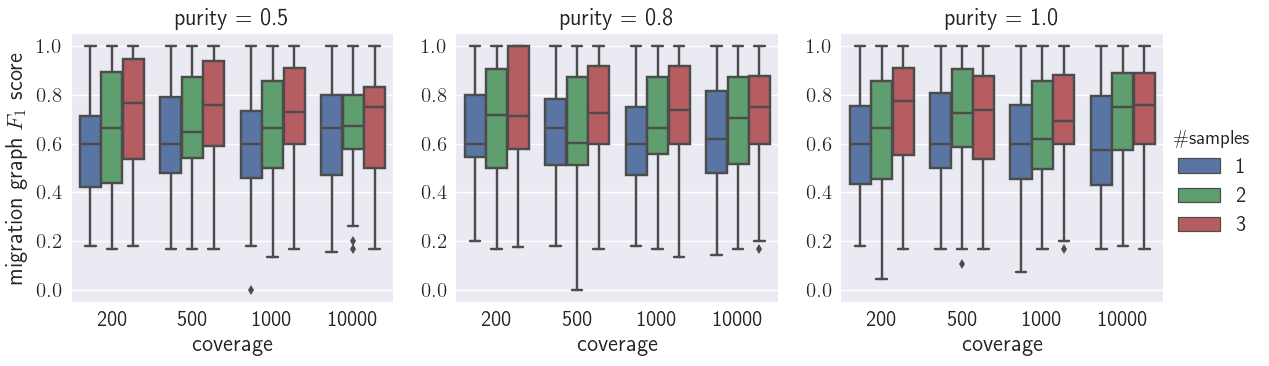

In [83]:
res_m5_down_mig = res_m5_down.groupby(['pattern', 'seed', '\#samples', 'purity', 'coverage'])['FscoreMultiG'].mean().to_frame("FscoreMultiG").reset_index(level=['\#samples', 'purity', 'coverage', 'pattern'])
ax = sns.factorplot(data=res_m5_down_mig, col="purity", hue="\#samples", 
                    x="coverage", order=[200, 500, 1000, 10000],
                    y="FscoreMultiG", 
                    kind="box")
ax.axes[0,0].set_ylabel('migration graph $F_1$ score')
plt.savefig("downsampling_scoreG.pdf")

In [97]:
res_m5_down_cluster = pd.read_csv("../sims/machina/results_CLUSTERING_m5_downsampled.txt", sep="\t")
res_m5_down_cluster['sample'] = res_m5_down_cluster['samples'].fillna(0.0).astype(int)
res_m5_down_cluster['coverage'] = res_m5_down_cluster['coverage'].fillna(0.0).astype(int)
res_m5_down_cluster.rename(index=str, columns={'samples' : '\#samples'}, inplace=True)

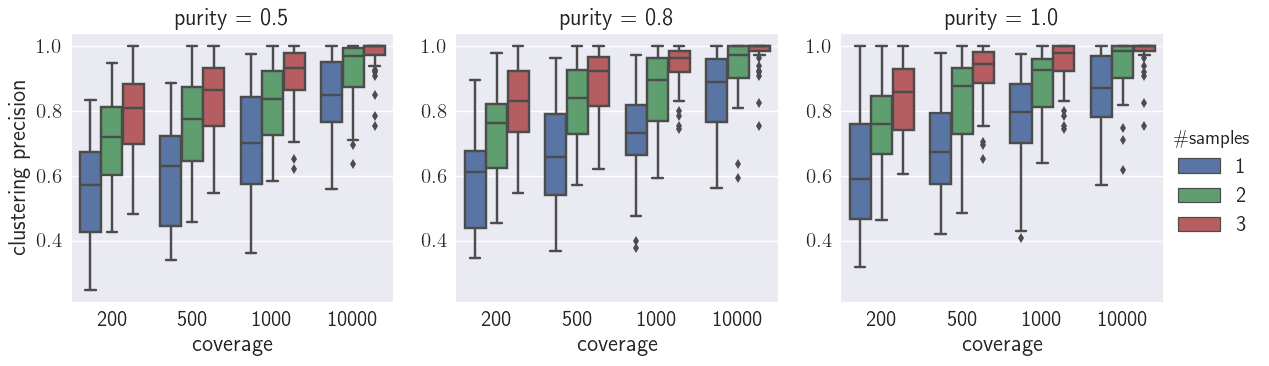

In [98]:
ax = sns.factorplot(data=res_m5_down_cluster, col="purity", hue="\#samples", 
                    x="coverage", order=[200,500,1000, 10000],
                    y="precision", 
                    kind="box")
ax.axes[0,0].set_ylabel('clustering precision')
plt.savefig("downsampling_precision.pdf")

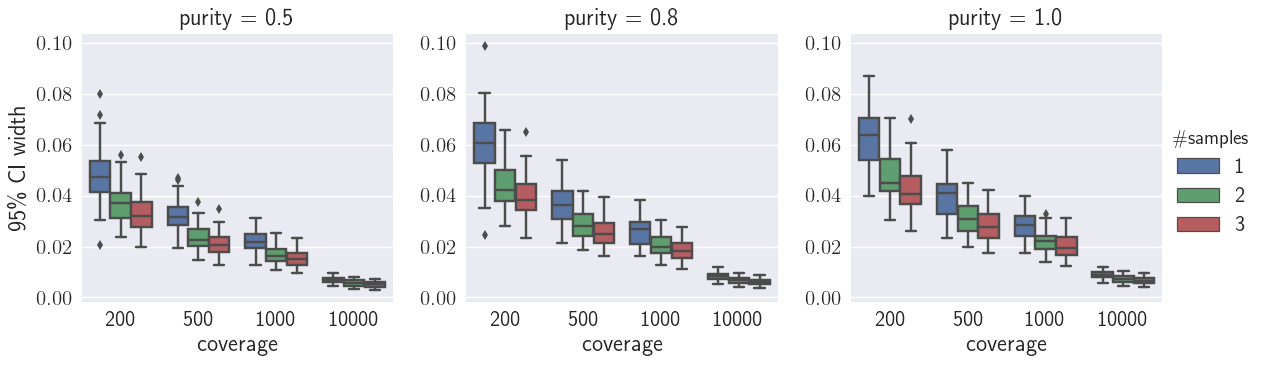

In [99]:
ax = sns.factorplot(data=res_m5_down_cluster, col="purity", hue="\#samples", 
                    x="coverage", order=[200,500,1000, 10000],
                    y="width", 
                    kind="box")
ax.axes[0,0].set_ylabel('95\% CI width')
plt.savefig("downsampling_width.pdf")

## Different mutation rates

In [223]:
res_m8_mut = pd.read_csv("../sims/machina/results_MACHINA_m8_mutrates.txt", sep=",")
res_m8_mut_cluster = pd.read_csv("../sims/machina/results_CLUSTERING_m8_mutrates.txt", sep="\t")

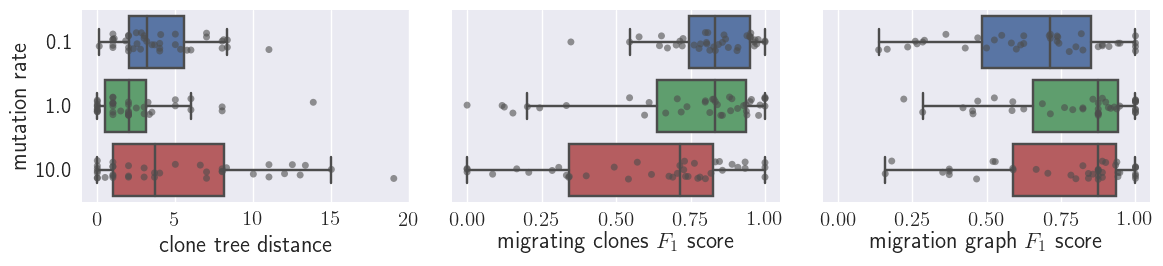

In [224]:
xx=['RF', 'FscoreT', 'FscoreMultiG']
xlabels=['clone tree distance', 'migrating clones $F_1$ score', 'migration graph $F_1$ score']
for i in range(len(xx)):
    plt.subplot(1,3,i+1)
    res_m8_mut_grp = res_m8_mut.groupby(['pattern', 'seed', 'mutrate'])[xx[i]].mean().to_frame(xx[i]).reset_index(level=['mutrate', 'pattern'])

    sns.boxplot(data=res_m8_mut_grp, y="mutrate", x=xx[i], orient="h",showfliers=False)
    sns.stripplot(data=res_m8_mut_grp, jitter=0.15, x =xx[i], y = 'mutrate', color=".3", alpha=0.6, orient='h')
    if i == 0:
        plt.ylabel("mutation rate")
    else: 
        plt.ylabel("")
        plt.yticks([],[])
    plt.xlabel(xlabels[i])
        
    if i == 0:
        plt.xlim((-1,max(res_m8_mut_grp['RF'])+1))
        plt.xticks(np.arange(0, max(res_m8_mut_grp['RF'])+2, 5.0))
    if i == 1 or i == 2:
        plt.xlim((-0.05,1.05))
        plt.xticks(np.arange(0, 1.05, 0.25))

plt.gcf().set_size_inches(12, 3)
plt.tight_layout()
plt.savefig("mut_rates_MACHINA.pdf")

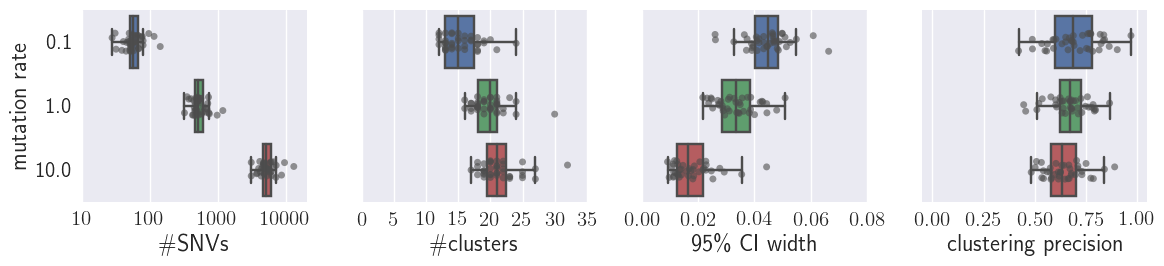

In [225]:
xx=['n', 'clusters', 'width', 'precision']
xlabels=['\#SNVs', '\#clusters', '95\% CI width', 'clustering precision']
for i in range(len(xx)):
    plt.subplot(1,4,i+1)
    ax1 = sns.boxplot(data=res_m8_mut_cluster, y="mutrate", x=xx[i], orient="h",showfliers=False)
    if i == 0:
        ax1.set_xscale('log')
    ax2 = sns.stripplot(data=res_m8_mut_cluster, jitter=0.15, x =xx[i], y = 'mutrate', color=".3", alpha=0.6, orient='h')
    if i == 0:
        ax2.set_xscale('log')
        ax2.set_xticks([10, 100, 1000, 10000])
        ax2.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

    if i == 0:
        plt.ylabel("mutation rate")
    else:
        plt.ylabel("")
        plt.yticks([],[])
    plt.xlabel(xlabels[i])
    
    if i == 1:
        plt.xlim((0,35))
        plt.xticks(np.arange(0, 40, 5.0))
    if i == 2:
        plt.xlim((0,0.08))
        plt.xticks(np.arange(0, 0.1, 0.02))
    if i == 3:
        plt.xlim((-0.05,1.05))
        plt.xticks(np.arange(0, 1.05, 0.25))

plt.gcf().set_size_inches(12, 3)
plt.tight_layout()
plt.savefig("mut_rates_clustering.pdf")

## Downsampling SNVs

In [237]:
res_m8_down = pd.read_csv("../sims/machina/results_MACHINA_m8_downsampled.txt", sep=",")
res_m8_down_cluster = pd.read_csv("../sims/machina/results_CLUSTERING_m8_downsampled.txt", sep="\t")

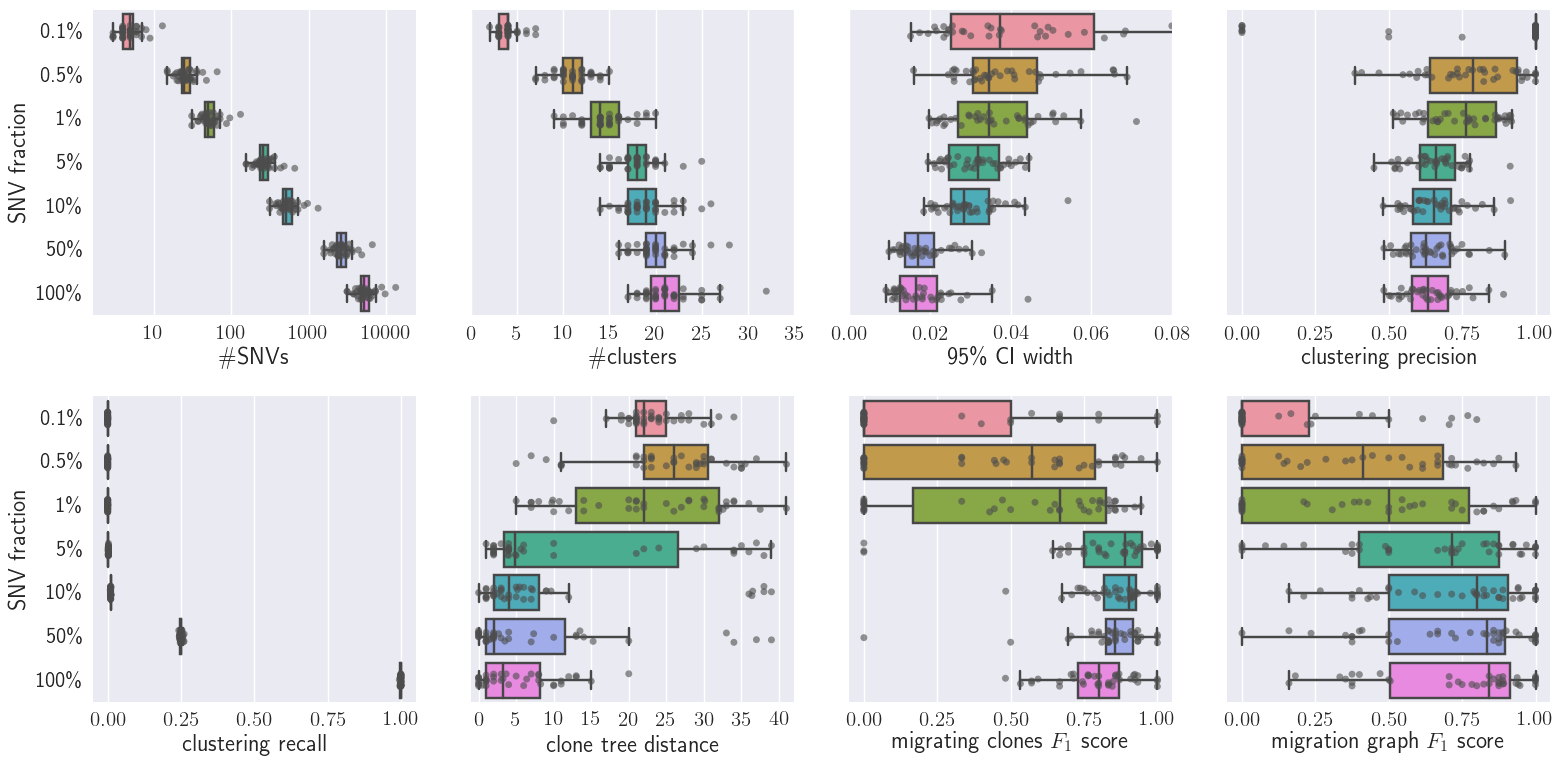

In [238]:
xx=['n', 'clusters', 'width', 'precision', 'recall']
xlabels=['\#SNVs', '\#clusters', '95\% CI width', 'clustering precision', 'clustering recall']
for i in range(len(xx)):
    plt.subplot(2,4,i+1)
    ax1 = sns.boxplot(data=res_m8_down_cluster, y="frac", x=xx[i], orient="h",showfliers=False)
    if i == 0:
        ax1.set_xscale('log')
    ax2 = sns.stripplot(data=res_m8_down_cluster, jitter=0.15, x =xx[i], y = 'frac', color=".3", alpha=0.6, orient='h')
    if i == 0:
        ax2.set_xscale('log')
        ax2.set_xticks([10, 100, 1000, 10000])
        ax2.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

    if i == 0 or i == 4:
        plt.ylabel("SNV fraction")
        ax1.set_yticklabels(['0.1\%', '0.5\%', '1\%', '5\%', '10\%', '50\%', '100\%'])
    else:
        plt.ylabel("")
        plt.yticks([],[])
    plt.xlabel(xlabels[i])
    
    if i == 1:
        plt.xlim((0,35))
        plt.xticks(np.arange(0, 40, 5.0))
    if i == 2:
        plt.xlim((0,0.08))
        plt.xticks(np.arange(0, 0.1, 0.02))
    if i == 3 or i == 4:
        plt.xlim((-0.05,1.05))
        plt.xticks(np.arange(0, 1.05, 0.25))

xx=['RF', 'FscoreTT', 'FscoreMultiG']
xlabels=['clone tree distance', 'migrating clones $F_1$ score', 'migration graph $F_1$ score']
for i in range(len(xx)):
    plt.subplot(2,4,i+6)
    res_m8_mut_grp = res_m8_down.groupby(['pattern', 'seed', 'frac'])[xx[i]].mean().to_frame(xx[i]).reset_index(level=['frac', 'pattern'])

    sns.boxplot(data=res_m8_mut_grp, y="frac", x=xx[i], orient="h",showfliers=False)
    sns.stripplot(data=res_m8_mut_grp, jitter=0.15, x =xx[i], y = 'frac', color=".3", alpha=0.6, orient='h')
#     if i == 1:
#         plt.ylabel("SNV fraction")
#     else: 
    plt.ylabel("")
    plt.yticks([],[])
    plt.xlabel(xlabels[i])
        
    if i == 0:
        plt.xlim((-1,max(res_m8_mut_grp['RF'])+1))
        plt.xticks(np.arange(0, max(res_m8_mut_grp['RF'])+2, 5.0))
    if i == 1 or i == 2:
        plt.xlim((-0.05,1.05))
        plt.xticks(np.arange(0, 1.05, 0.25))
        
plt.gcf().set_size_inches(16, 8)
plt.tight_layout()
plt.savefig("SNV_frac_MACHINA.pdf")

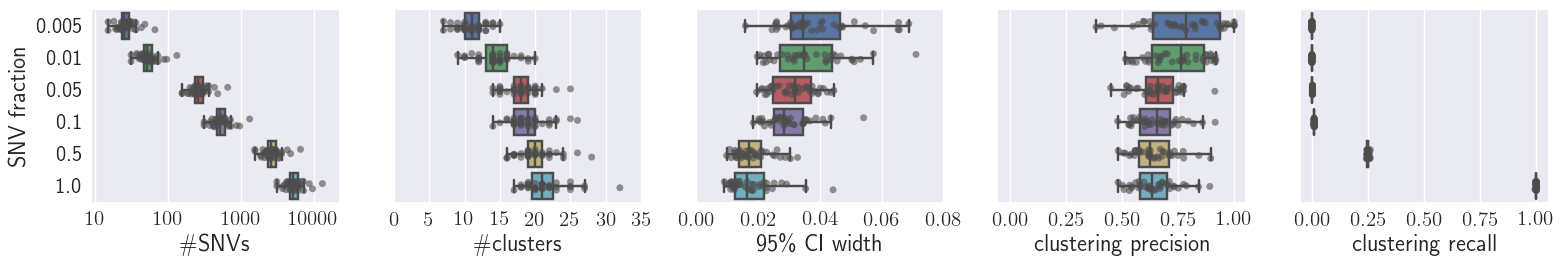